In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("/content/sample_data/Mall_Customers (2).csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Text(0.5, 1.0, 'Mall Customer Data')

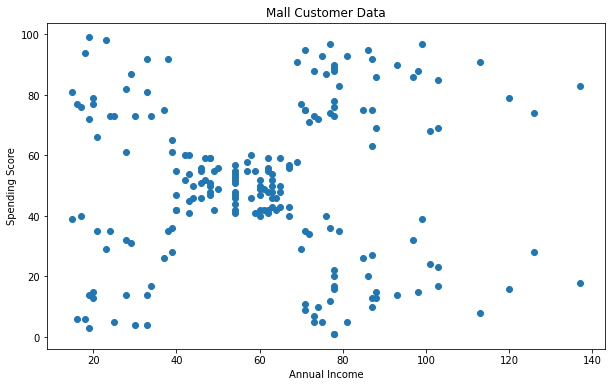

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(df["Annual Income (k$)"] , df["Spending Score (1-100)"])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Mall Customer Data")

In [10]:
x = df.iloc[:,-2:]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [11]:
clustering_score = []

for i in range(2,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(x)
  clustering_score.append(kmeans.inertia_) 

In [12]:
clustering_score

[181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37271.88623658949,
 30241.34361793658,
 25031.41895274515,
 22870.412610911546,
 19653.383606248826]

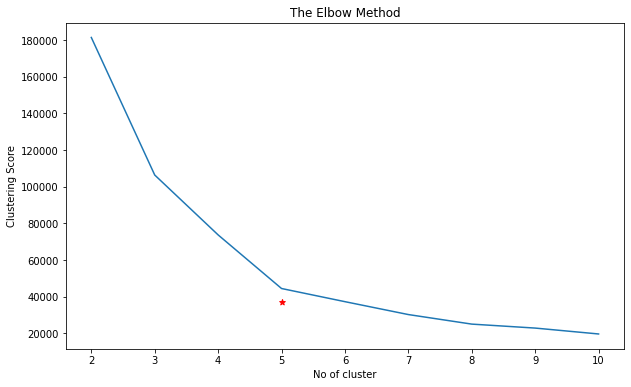

In [14]:
plt.figure(figsize=(10,6))
plt.plot(range(2,11),clustering_score)
plt.scatter(5,clustering_score[4],c = "red",marker = "*")
plt.title("The Elbow Method")
plt.xlabel("No of cluster")
plt.ylabel("Clustering Score")
plt.show()

In [15]:
kmeans  = KMeans(n_clusters=5)
kmeans.fit(x)

KMeans(n_clusters=5)

In [16]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

In [17]:
kmeans.feature_names_in_

array(['Annual Income (k$)', 'Spending Score (1-100)'], dtype=object)

In [27]:
pred = kmeans.predict(x)

In [22]:
df["Cluster"] = kmeans.predict(x)

In [23]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


In [25]:
df["Cluster"].value_counts()

0    81
2    39
1    35
3    23
4    22
Name: Cluster, dtype: int64

Text(0.5, 1.0, 'Mall Customer Cluster')

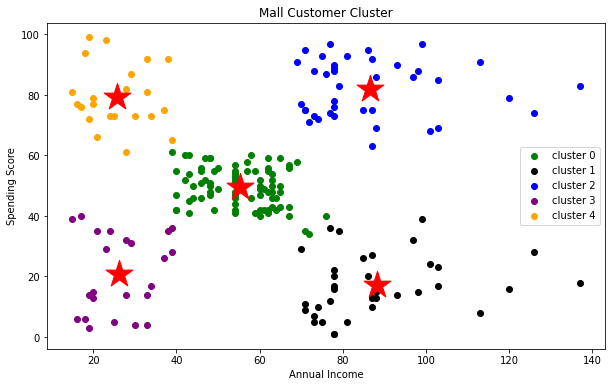

In [45]:
plt.figure(figsize=(10,6))

plt.scatter(df["Annual Income (k$)"][df["Cluster"]==0],df["Spending Score (1-100)"][df["Cluster"]==0],c = "green",label = "cluster 0")
plt.scatter(df["Annual Income (k$)"][df["Cluster"]==1],df["Spending Score (1-100)"][df["Cluster"]==1],c = "black",label = "cluster 1")
plt.scatter(df["Annual Income (k$)"][df["Cluster"]==2],df["Spending Score (1-100)"][df["Cluster"]==2],c = "blue",label = "cluster 2")
plt.scatter(df["Annual Income (k$)"][df["Cluster"]==3],df["Spending Score (1-100)"][df["Cluster"]==3],c = "purple",label = "cluster 3")
plt.scatter(df["Annual Income (k$)"][df["Cluster"]==4],df["Spending Score (1-100)"][df["Cluster"]==4],c = "orange",label = "cluster 4")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s= 800 ,c ="red",marker="*" )
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.title("Mall Customer Cluster")

In [40]:
kmeans.cluster_centers_[:,0]

array([55.2962963 , 88.2       , 86.53846154, 26.30434783, 25.72727273])